<a href="https://colab.research.google.com/github/sidharthworks/chat/blob/master/Holt_Winter_Add%26Mul_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install if needed
!pip install statsmodels --quiet

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
# Import required libraries
import pandas as pd
from google.colab import files

# Ask user to upload the file
uploaded = files.upload()

# Get file name (assuming only one file uploaded)
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)

# Parse date column
df['datum'] = pd.to_datetime(df['datum'])

# Set 'datum' as index
df.set_index('datum', inplace=True)

# Display first few rows
df.head()


Saving salesweekly.csv to salesweekly.csv


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


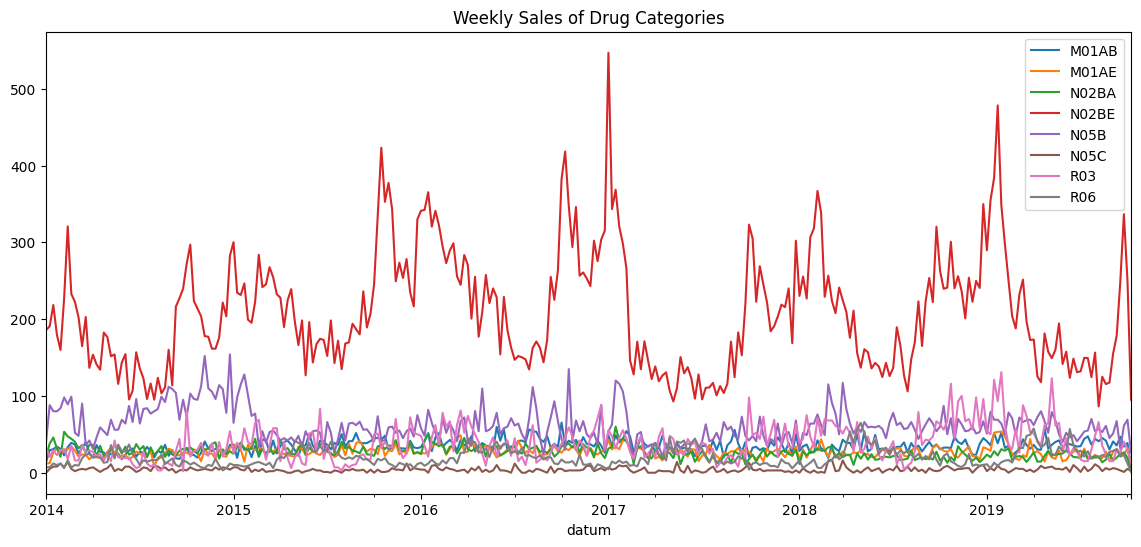

In [ ]:
# Plot all drug categories
df.plot(figsize=(14,6))
plt.title("Weekly Sales of Drug Categories")
plt.show()


In [ ]:
# Combine forecasts into one DataFrame
forecast_df = pd.DataFrame()

for col in results:
    forecast_df[col] = results[col]["forecast"]

# Show combined forecasts
forecast_df.head()

# Save to CSV
forecast_df.to_csv("holt_winters_forecasts.csv")
print("✅ Forecasts saved as holt_winters_forecasts.csv")


✅ Forecasts saved as holt_winters_forecasts.csv


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(series, seasonal_periods=52, test_size=26):
    # Train-test split
    train, test = series[:-test_size], series[-test_size:]
    train[train <= 0] = 1e-3  # fix for multiplicative
    test[test <= 0] = 1e-3

    model = ExponentialSmoothing(train,
                                 trend="add",
                                 seasonal="mul",
                                 seasonal_periods=seasonal_periods)
    fit = model.fit(optimized=True)
    forecast = fit.forecast(test_size)

    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = np.mean(np.abs((test - forecast) / test)) * 100

    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}

# Evaluate all categories
metrics = {}
for col in df.columns:
    metrics[col] = evaluate_model(df[col])

pd.DataFrame(metrics).T


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  

,MAE,RMSE,MAPE
M01AB,7.047495,9.345343,28.555151
M01AE,7.680595,9.399908,49.899952
N02BA,5.078578,6.763138,36.270795
N02BE,34.995472,45.632100,24.943274
N05B,23.398148,27.942722,52.693432
N05C,2.881446,3.443286,75.644908
R03,22.436864,28.811096,73.151081
R06,12.226012,14.827978,133.712314


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(series, seasonal_periods=52, test_size=26):
    # Train-test split
    train, test = series[:-test_size], series[-test_size:]
    train[train <= 0] = 1e-3  # fix for multiplicative
    test[test <= 0] = 1e-3

    model = ExponentialSmoothing(train,
                             trend="add",
                             seasonal="add",  # instead of "mul"
                             seasonal_periods=seasonal_periods)

    fit = model.fit(optimized=True)
    forecast = fit.forecast(test_size)

    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape = np.mean(np.abs((test - forecast) / test)) * 100

    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}

# Evaluate all categories
metrics = {}
for col in df.columns:
    metrics[col] = evaluate_model(df[col])

pd.DataFrame(metrics).T


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/

,MAE,RMSE,MAPE
M01AB,6.990079,9.246152,28.134396
M01AE,8.008712,9.786790,51.951004
N02BA,5.865994,7.714766,38.214629
N02BE,37.567608,47.979963,26.481975
N05B,21.325007,25.546391,48.361411
N05C,2.909770,3.433692,73.742723
R03,23.082736,28.617001,88.868060
R06,14.937258,16.581261,178.060517


Saving salesweekly.csv to salesweekly (7).csv


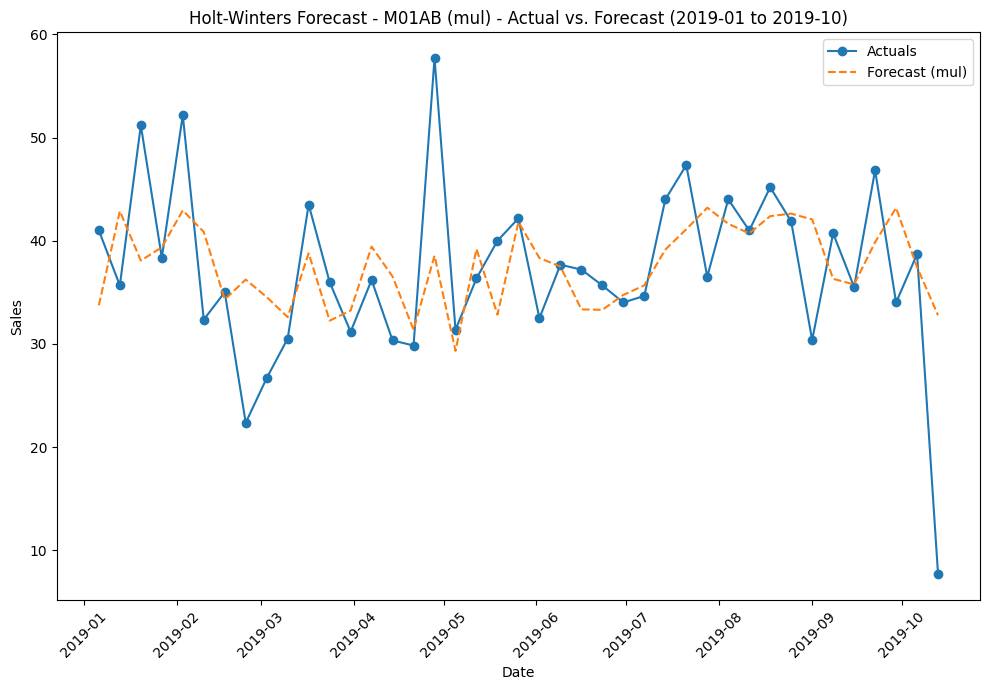

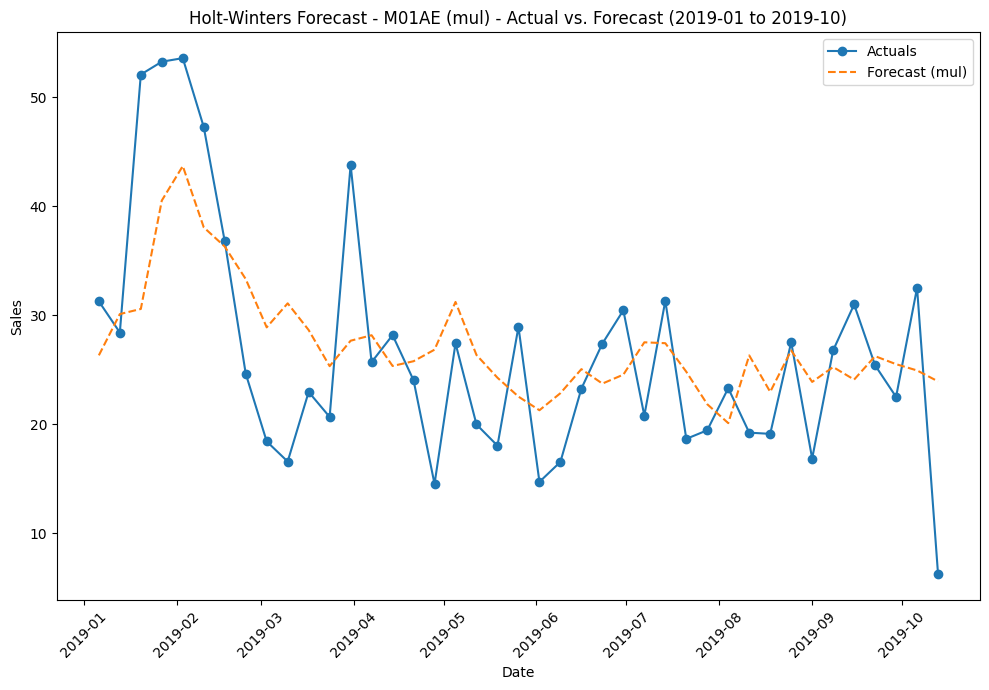

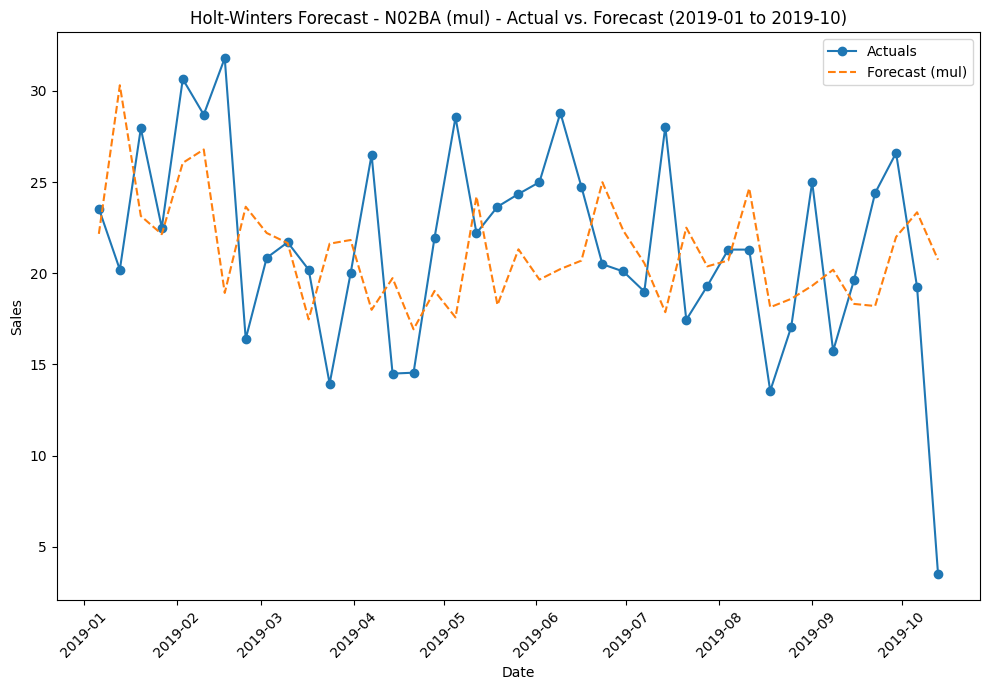

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


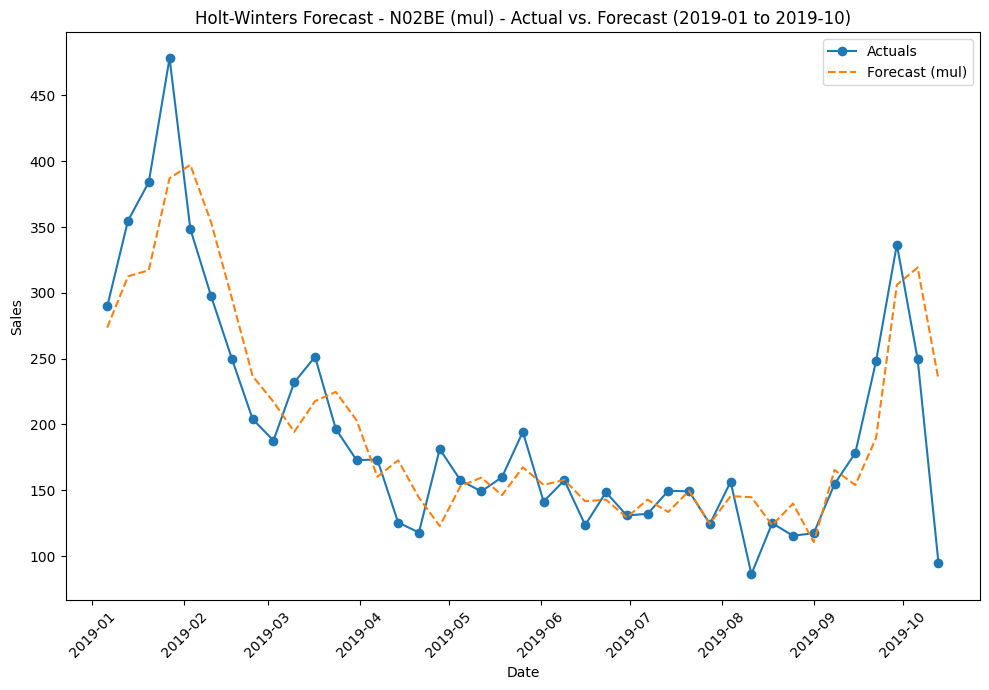

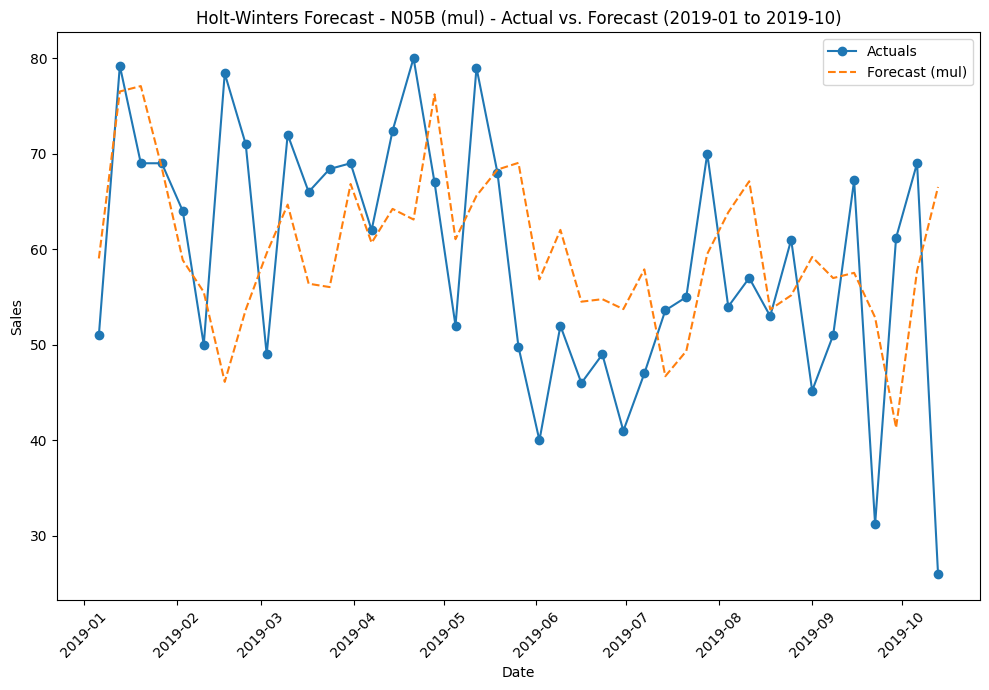

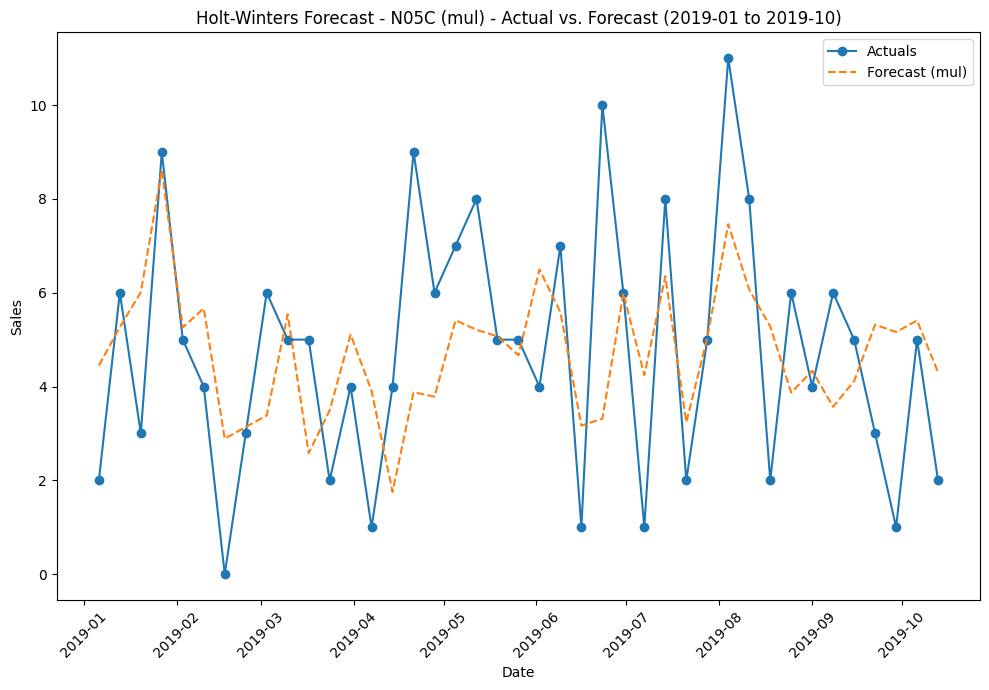

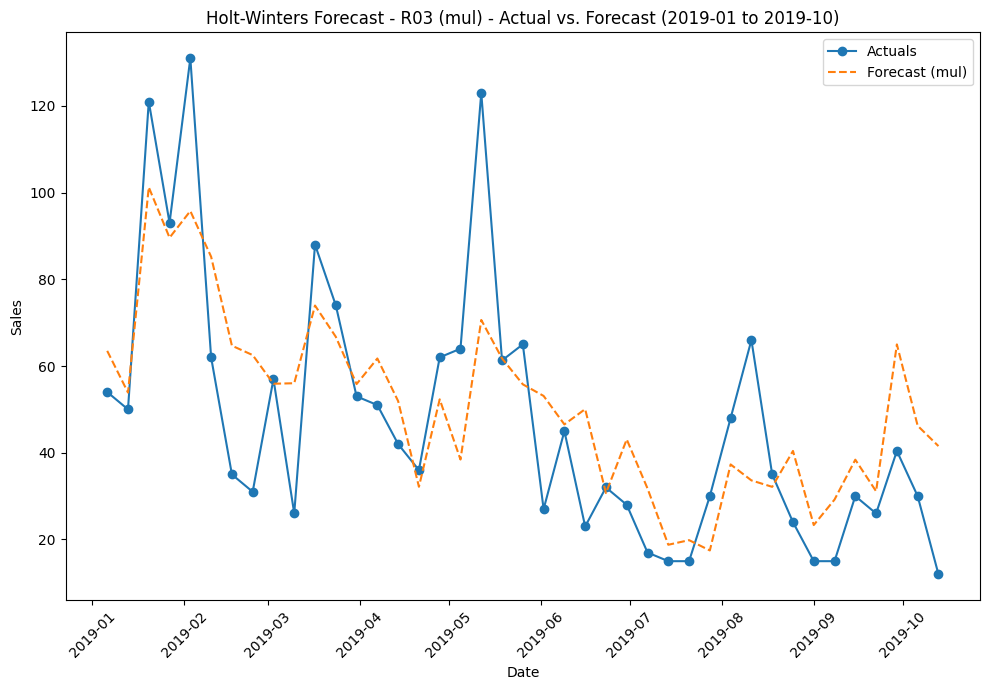

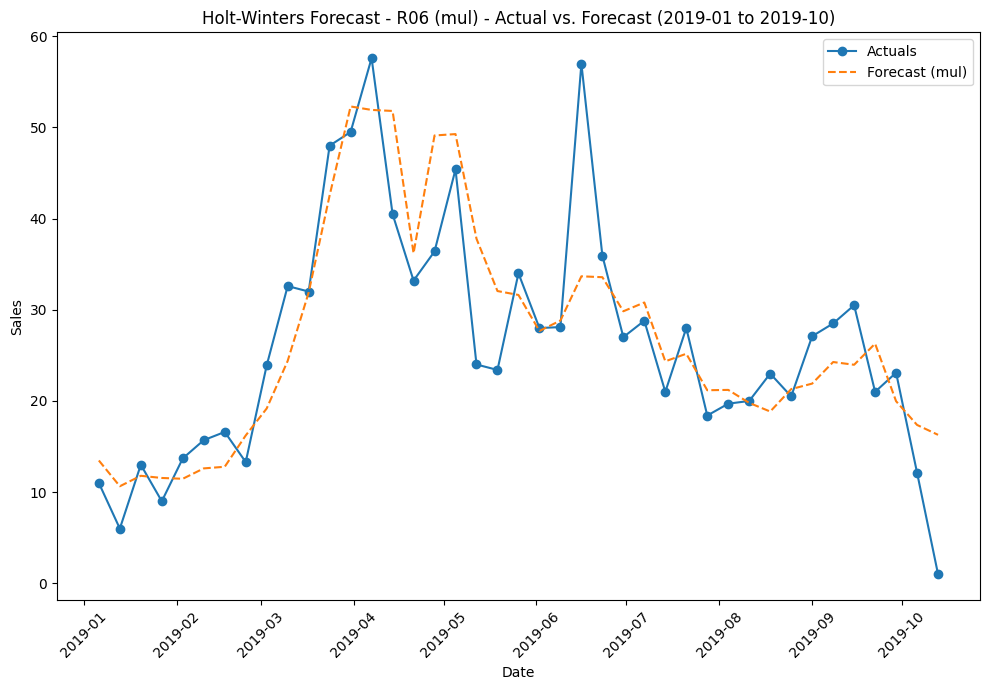

Category: M01AB
Best Method: mul
Metrics: {'MAE': 5.384682210120472, 'RMSE': np.float64(7.5154098396028255), 'MAPE': np.float64(20.947773825725648)}
--------------------------------------------------
Category: M01AE
Best Method: mul
Metrics: {'MAE': 6.477652002685343, 'RMSE': np.float64(8.026006527956731), 'MAPE': np.float64(31.32566015782293)}
--------------------------------------------------
Category: N02BA
Best Method: mul
Metrics: {'MAE': 4.722350618446523, 'RMSE': np.float64(5.962247159231091), 'MAPE': np.float64(31.7438993306055)}
--------------------------------------------------
Category: N02BE
Best Method: mul
Metrics: {'MAE': 30.74696701140966, 'RMSE': np.float64(41.498466183259055), 'MAPE': np.float64(17.29420321417924)}
--------------------------------------------------
Category: N05B
Best Method: mul
Metrics: {'MAE': 10.647045042193334, 'RMSE': np.float64(13.228824277547965), 'MAPE': np.float64(21.16233272842858)}
--------------------------------------------------
Categor

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Performance metrics function ----
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Avoid division by zero in MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}

# ---- Auto Holt-Winters (Additive vs Multiplicative) ----
def auto_holt_winters(df, start_date="2019-01-01", end_date="2019-10-31", seasonal_periods=52):
    results = {}

    for col in df.columns:
        series = df[col].copy()
        series = series.asfreq("W-SUN")  # weekly frequency
        series[series <= 0] = 1e-3       # fix for multiplicative models

        metrics_dict = {}
        preds_dict = {}

        for season in ["add", "mul"]:
            try:
                model = ExponentialSmoothing(
                    series, # Fit on the entire series
                    trend="add",
                    seasonal=season,
                    seasonal_periods=seasonal_periods
                ).fit()

                # Get the index for the specified date range from the actual data
                actuals_in_range = series.loc[start_date:end_date]
                start_index = actuals_in_range.index.min()
                end_index = actuals_in_range.index.max()


                # Forecast for the specified date range using the index
                preds = model.predict(start=start_index, end=end_index)
                preds_dict[season] = preds

                # Evaluate metrics within the specified date range
                common_index = actuals_in_range.index.intersection(preds.index)
                if not common_index.empty:
                    metrics = evaluate_forecast(actuals_in_range.loc[common_index], preds.loc[common_index])
                    metrics_dict[season] = metrics
                else:
                    metrics_dict[season] = {"MAE": np.nan, "RMSE": np.nan, "MAPE": np.nan} # No overlapping data


            except Exception as e:
                print(f"⚠️ {col} - {season} model failed: {e}")
                metrics_dict[season] = {"RMSE": np.inf} # Assign high RMSE to failed models
                # Create a Series of NaNs with the correct index for failed forecasts
                index_range = pd.date_range(start=start_date, end=end_date, freq="W-SUN")
                preds_dict[season] = pd.Series([np.nan] * len(index_range), index=index_range)


        # Pick best method by RMSE, handle cases where both methods failed
        if all(m["RMSE"] == np.inf for m in metrics_dict.values()):
             print(f"⚠️ Both additive and multiplicative models failed for {col}. Skipping plotting.")
             continue # Skip plotting if both methods failed
        else:
            # Filter out failed models (RMSE is np.inf or NaN) before finding the minimum
            valid_metrics = {k: v for k, v in metrics_dict.items() if not np.isnan(v["RMSE"]) and v["RMSE"] != np.inf}

            if not valid_metrics: # If no valid models after filtering
                 print(f"⚠️ No valid models for {col} after filtering. Skipping plotting.")
                 continue # Skip plotting if no valid models

            # Choose best method based on RMSE
            best_season = min(valid_metrics, key=lambda x: valid_metrics[x]["RMSE"])


        results[col] = {
            "Best Method": best_season,
            "Metrics": metrics_dict.get(best_season, {"MAE": np.nan, "RMSE": np.inf, "MAPE": np.nan}), # Use .get to handle cases where best_season might not be in original metrics_dict
            "Forecast": preds_dict[best_season],
            "Actuals in Range": series.loc[start_date:end_date]
        }


        # Plot actual vs forecast for the specified date range
        plt.figure(figsize=(10,7))
        plt.plot(series.loc[start_date:end_date].index, series.loc[start_date:end_date], label="Actuals", marker="o")
        plt.plot(preds_dict[best_season].index, preds_dict[best_season], label=f"Forecast ({best_season})", linestyle="--")
        plt.title(f"Holt-Winters Forecast - {col} ({best_season}) - Actual vs. Forecast (2019-01 to 2019-10)")
        plt.xlabel("Date")
        plt.ylabel("Sales")
        plt.legend()
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator()) # Set monthly intervals
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m')) # Format x-axis labels as Year-Month
        plt.xticks(rotation=45) # Rotate x-axis labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()


    return results

# -------------------------
# Load your dataset
# -------------------------
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("salesweekly.csv")
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index("datum")

# -------------------------
# Run auto Holt-Winters
# -------------------------
results = auto_holt_winters(df, start_date="2019-01-01", end_date="2019-10-31", seasonal_periods=52)

# -------------------------
# Print summary
# -------------------------
for cat, info in results.items():
    print(f"Category: {cat}")
    print("Best Method:", info["Best Method"])
    print("Metrics:", info["Metrics"])
    print("-"*50)